In [ ]:
#for saving files and trained models to save RAM
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


##Install and import packages




In [ ]:
pip install pmaw pandas

In [ ]:
import pandas as pd
import numpy as np
import torch
import datetime as dt
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from pmaw import PushshiftAPI

# Scrape data


In [ ]:
api = PushshiftAPI()


# choose the timeframe of reddit posts you need
before = int(dt.datetime(2021,1,1,0,0).timestamp())
after = int(dt.datetime(2020,1,1,0,0).timestamp())

subreddit="stocks"
limit=100
sub = api.search_submissions(subreddit=subreddit, limit=limit, before=before, after=after)
print(f'Retrieved {len(sub)} posts from Pushshift')

sub_df=pd.DataFrame(sub)
y = sub_df.sort_values(by='created_utc')
y.to_csv("/content/drive/MyDrive/Erdos_Project/Data/sorted_posts.csv")



Not all PushShift shards are active. Query results may be incomplete.
Not all PushShift shards are active. Query results may be incomplete.


Total:: Success Rate: 100.00% - Requests: 1 - Batches: 1 - Items Remaining: 0
Retrieved 100 posts from Pushshift


# SPY data

SPY data (Upload kaggle file). Remember to add to folder short cut to your drive before running this.



Preprocessing to extract 2020 values only

In [ ]:
SPY_data_small = pd.read_csv('/content/drive/MyDrive/Erdos_Project/Data/1_min_SPY_2008-2021_SMALL_datetime.csv')

In [ ]:
SPY_data_small['datetime'] = pd.to_datetime(SPY_data_small['date'])

In [ ]:
SPY_data_small.to_csv('/content/drive/MyDrive/Erdos_Project/Data/1_min_SPY_2008-2021_SMALL_datetime.csv')

In [ ]:
SPY_Data_2019_2020 = SPY_data_small.loc[(SPY_data_small['datetime']>='2019-01-01')&(SPY_data_small['datetime']<'2021-01-01')].sort_values('date',ascending=True).reset_index()

In [ ]:
SPY_Data_2020.to_csv('/content/drive/MyDrive/Erdos_Project/Data/1_min_SPY_2020.csv')

Begin Execution of SPY data here.

In [ ]:
SPY_data_2020 = pd.read_csv('/content/drive/MyDrive/Erdos_Project/Data/1_min_SPY_2020.csv')

In [ ]:
SPY_data_2020.index = pd.to_datetime(SPY_data_2020['date']) #set the dates to be the index

In [ ]:
SPY_data_2020_avg = SPY_data_2020['average'] #use the average for a particular minute

In [ ]:
#https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
def create_dataset(dataset, look_back=1): #adjust each Y value so that they are "look_back" ahead of current value
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(dataset[i + look_back])
	return np.array(dataX), np.array(dataY)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
SPY2020_avg_val_transformed = sc.fit_transform( SPY_data_2020_avg.values.reshape(-1,1))
look_back=10
Xtrain_org, Ytrain = create_dataset(SPY2020_avg_val_transformed,look_back)
Ytrain =np.reshape(Ytrain, (-1,1))
Xtrain=np.reshape(Xtrain_org, (Xtrain_org.shape[0],Xtrain_org.shape[1],1))

# Sentiment

In [ ]:
# Import libraries
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from urllib.request import urlopen
from urllib.request import Request
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
redditcsv= pd.read_csv("/content/drive/MyDrive/Erdos_Project/Data/sorted_posts.csv")

#  redditcsv.sort_values(by='comment_created',ascending=False, ignore_index=True, inplace=True)

# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()
# Date + time into one column -> to_datetime
#columns = ['Time', 'Headline'] #change according to your csv
#news = pd.DataFrame(parsed_news, columns=columns) #replace parsed_news by your csv file
scores = redditcsv['title'].apply(analyzer.polarity_scores).tolist()

timestamp = redditcsv['created_utc'].apply(dt.datetime.fromtimestamp)

df_scores = pd.DataFrame(scores)
redditcsv = redditcsv.join(df_scores)
df_time = pd.DataFrame(timestamp)

redditcsv = redditcsv.join(df_time,rsuffix='time')


# Average Setiment  
 
<!-- ```
# 

```

# Get Data
finviz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}

for ticker in tickers:
    url = finviz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    resp = urlopen(req)    
    html = BeautifulSoup(resp, features="lxml")
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

try:
    for ticker in tickers:
        df = news_tables[ticker]
        df_tr = df.findAll('tr')
    
        print ('\n')
        print ('Recent News Headlines for {}: '.format(ticker))
        
        for i, table_row in enumerate(df_tr):
            a_text = table_row.a.text
            td_text = table_row.td.text
            td_text = td_text.strip()
            print(a_text,'(',td_text,')')
            if i == n-1:
#Average sentiment -->


In [ ]:
SPY_data=pd.read_csv('/content/drive/MyDrive/Erdos_Project/Data/1_min_SPY_2020.csv')
SPY= SPY_data#.tail(100)
# print(SPY)

# data=pd.read_csv('_withdatetime.csv') # post sentiment score is the file containing the scores and times
data=redditcsv
from datetime import timedelta
SPY_2020_date=SPY['date'].tolist()
ave_sentiment=[]
window = timedelta(minutes=5)  # time window to average out the comment score


#create datetime from timestamp(UNIX Epoch time)

timestamp = data['created_utc'].apply(dt.datetime.fromtimestamp)


l=[]
for i in range(0,len(timestamp)):
    l.append(timestamp[i].to_pydatetime())
    

data['ddtime'] = l # this creates a new time column in our sentiment_score which is now datetime object

ave_sentiment=[]
  


for i in range(len(SPY_2020_date)):  
    
    #find all rows in the data with time in the timeframe of i'th market entry and (i-5)th entry 
    lst=data.loc[ (((dt.datetime.strptime(SPY_2020_date[i],"%Y%m%d  %X"))- window) < data['ddtime'] )   & (data['ddtime']<=(dt.datetime.strptime(SPY_2020_date[i],"%Y%m%d  %X")))] # (data['dtime'] <= dt.datetime( SPY_2020_date[i])) precise time window
    
    #if it is nonempty, put the mean in the i'th spot of the array ave_sentiment
    if ( not lst.empty):
      ave=np.mean(lst['compound'])  
    else :
      ave=0
    
    ave_sentiment.append(ave)
dic={'Average_post_sentiment': ave_sentiment}
ave_sentiment=pd.DataFrame(dic)
ave_sentiment.to_csv("/content/drive/MyDrive/Erdos_Project/Data/Average_Post_ScoreTime.csv")

KeyboardInterrupt: ignored

# Network without sentiment


Recurrent Neural Networks and Long Short Term Memory (RNN and LSTM). The idea is we use the sentiment analysis to produce the score (unsupervised), use RNN to fit the score to the market movement (supervised). For testing, we first calculate the sentiment for the test info (unsupervised), feed it to the trained RRN, and predict the market. 
Reference: https://arxiv.org/pdf/1705.02447.pdf
Github: https://github.com/irfanICMLL/EMM-for-stock-prediction



In [ ]:
data=Xtrain
label=Ytrain
r=0.6 #Change the rate here
v=0.2 #validation
t=1-r-v #test


l=len(data)
split_point1=int(r*l)
split_point2=int((1-t)*l)


X_train=data[:split_point1]
X_val=data[split_point1:split_point2]
X_test=data[split_point2:]

Y_train=label[:split_point1].reshape(-1)
Y_val=label[split_point1:split_point2].reshape(-1)
Y_test=label[split_point2:].reshape(-1)





In [ ]:
#Without 
model_without = keras.Sequential([                           
                           keras.layers.LSTM(50,return_sequences = True),
                           keras.layers.Dropout((0.2)),
                           keras.layers.LSTM(50,return_sequences = True),
                           keras.layers.Dropout((0.2)),
                           keras.layers.LSTM(50),
                           keras.layers.Dropout((0.2)),
                           keras.layers.Dense(1)
])
opt1 = keras.optimizers.Adam(learning_rate=0.001)
model_without.compile(loss='mean_squared_error', optimizer=opt1)

batch_size=32
epochs =20
history = model_without.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, Y_val))
#save model
model_without.save("/content/drive/MyDrive/Erdos_Project/Data/")
train_predict = (model_without.predict(X_train)).reshape(-1)
test_predict = (model_without.predict(X_test)).reshape(-1)

Epoch 1/20
3949/3949 [==============================] - 111s 20ms/step - loss: 0.0057 - val_loss: 2.4389e-05
Epoch 2/20
3949/3949 [==============================] - 79s 20ms/step - loss: 3.5843e-04 - val_loss: 1.0224e-05
Epoch 3/20
3949/3949 [==============================] - 81s 20ms/step - loss: 2.5455e-04 - val_loss: 7.8207e-05
Epoch 4/20
3949/3949 [==============================] - 81s 20ms/step - loss: 2.3800e-04 - val_loss: 4.3889e-04
Epoch 5/20
3949/3949 [==============================] - 80s 20ms/step - loss: 2.3545e-04 - val_loss: 2.2670e-05
Epoch 6/20
3949/3949 [==============================] - 81s 21ms/step - loss: 2.3292e-04 - val_loss: 2.2142e-04
Epoch 7/20
3949/3949 [==============================] - 83s 21ms/step - loss: 2.2046e-04 - val_loss: 5.4333e-06
Epoch 8/20
3949/3949 [==============================] - 82s 21ms/step - loss: 2.1949e-04 - val_loss: 2.9600e-05
Epoch 9/20
3949/3949 [==============================] - 81s 21ms/step - loss: 2.0872e-04 - val_loss: 8.1330

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Erdos_Project/Data/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Erdos_Project/Data/assets


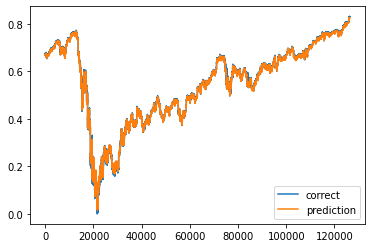

In [ ]:
#Without version
plt.plot(Y_train.reshape(-1))
plt.plot(train_predict)
plt.legend(['correct', 'prediction'], loc='lower right')
plt.show()

<function matplotlib.pyplot.show>

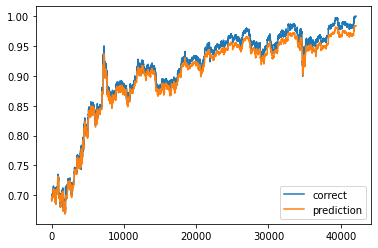

In [ ]:
#Without version
plt.plot(Y_test.reshape(-1))
plt.plot(test_predict)
plt.legend(['correct', 'prediction'], loc='lower right')
plt.show

# Network with senitment reddit


In [ ]:


reddit=pd.read_csv("/content/drive/MyDrive/Erdos_Project/Data/"+'Average_Post_ScoreTime.csv')['Average_post_sentiment'].values
data= np.concatenate((SPY2020_avg_val_transformed.reshape((-1,1)),reddit.reshape((-1,1))), axis=1)

data_transformed = sc.fit_transform( data)

X, Y = create_dataset(data_transformed,look_back)
Y=Y[:,0]




#label_5=find_volatility(Ytrain_5)
r=0.6 #Change the rate here
v=0.2 #validation
t=1-r-v #test


l=len(X)
split_point1=int(r*l)
split_point2=int((1-t)*l)


X_train=X[:split_point1]
X_val=X[split_point1:split_point2]
X_test=X[split_point2:]

Y_train=Y[:split_point1].reshape(-1)
Y_val=Y[split_point1:split_point2].reshape(-1)
Y_test=Y[split_point2:].reshape(-1)





In [ ]:
#With sentiment

model_with = keras.Sequential([                           
                           keras.layers.LSTM(50,return_sequences = True),
                           keras.layers.Dropout((0.2)),
                           keras.layers.LSTM(50,return_sequences = True),
                           keras.layers.Dropout((0.2)),
                           keras.layers.LSTM(50),
                           keras.layers.Dropout((0.2)),
                           keras.layers.Dense(1)
])
opt1 = keras.optimizers.Adam(learning_rate=0.001)
model_with.compile(loss='mean_squared_error', optimizer=opt1)
batch_size=32
epochs =20
history = model_with.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, Y_val))
model_with.save("/content/drive/MyDrive/Erdos_Project/Data/")
train_predict = (model_with.predict(X_train)).reshape(-1)
test_predict = (model_with.predict(X_test)).reshape(-1)

Epoch 1/20
3949/3949 [==============================] - 88s 21ms/step - loss: 0.0049 - val_loss: 6.8413e-05
Epoch 2/20
3949/3949 [==============================] - 80s 20ms/step - loss: 3.4676e-04 - val_loss: 3.6869e-05
Epoch 3/20
3949/3949 [==============================] - 79s 20ms/step - loss: 2.5429e-04 - val_loss: 9.7824e-05
Epoch 4/20
3949/3949 [==============================] - 80s 20ms/step - loss: 2.3787e-04 - val_loss: 1.9417e-05
Epoch 5/20
3949/3949 [==============================] - 81s 20ms/step - loss: 2.2810e-04 - val_loss: 4.0013e-05
Epoch 6/20
3949/3949 [==============================] - 81s 21ms/step - loss: 2.2582e-04 - val_loss: 4.6066e-05
Epoch 7/20
3949/3949 [==============================] - 81s 20ms/step - loss: 2.1610e-04 - val_loss: 3.5519e-05
Epoch 8/20
3949/3949 [==============================] - 81s 20ms/step - loss: 2.1932e-04 - val_loss: 1.3351e-05
Epoch 9/20
3949/3949 [==============================] - 81s 20ms/step - loss: 2.0636e-04 - val_loss: 4.1363e

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Erdos_Project/Data/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Erdos_Project/Data/assets


In [ ]:
#With version
plt.plot(Y_train.reshape(-1))
plt.plot(train_predict)
plt.legend(['correct', 'prediction'], loc='lower right')
plt.show()

In [ ]:
train_predict = (model_with.predict(X_train)).reshape(-1)
test_predict = (model_with.predict(X_test)).reshape(-1)

<function matplotlib.pyplot.show>

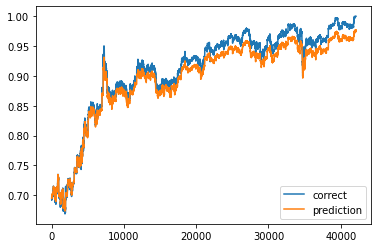

In [ ]:
#With version
plt.plot(Y_test.reshape(-1))
plt.plot(test_predict)
plt.legend(['correct', 'prediction'], loc='lower right')
plt.show